        Date  Age          WorkClass  fnlwgt   education  education-num  \
0  3/20/1994   39          State-gov   77516   Bachelors             13   
1  1/14/1994   50   Self-emp-not-inc   83311   Bachelors             13   
2  8/14/1994   38            Private  215646     HS-grad              9   
3  3/17/1994   53            Private  234721        11th              7   
4  9/20/1994   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0 

C:\Users\nites\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Decision Tree using Gini Index
Accuracy is 74.67123439054039 

Classification Report is
               precision    recall  f1-score   support

           0       0.75      1.00      0.85      6764
           1       0.11      0.00      0.00      2285

    accuracy                           0.75      9049
   macro avg       0.43      0.50      0.43      9049
weighted avg       0.59      0.75      0.64      9049



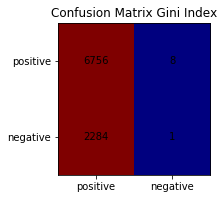

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[6756    8]
 [2284    1]]


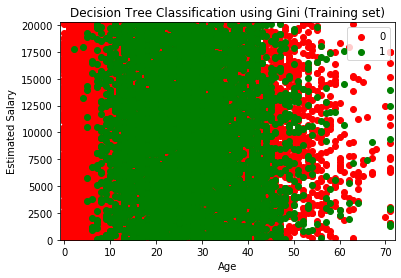

Decision Tree using Entropy
Accuracy is 74.74859100453088 

Classification Report is
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      6764
           1       0.00      0.00      0.00      2285

    accuracy                           0.75      9049
   macro avg       0.37      0.50      0.43      9049
weighted avg       0.56      0.75      0.64      9049



C:\Users\nites\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


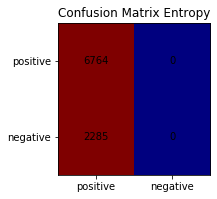

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[6764    0]
 [2285    0]]


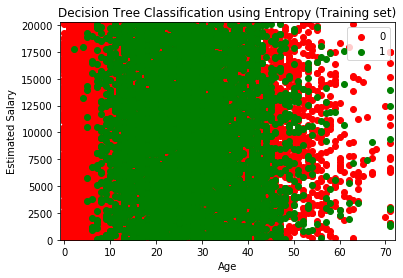

In [5]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt

from sklearn import datasets, neighbors, linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import preprocessing
import sklearn.metrics as metrics

####### 1. Load census dataset as provided.#######

#read the csv file into a Pandas data frame
df_census = pd.read_csv('census1994.csv', delimiter = ',')

####### 2. Create a dataframe and print the first and last five records of your dataset.#######

#return the first 5 rows of the dataset
print(df_census.head(5))

#return the last 5 rows of the dataset
print(df_census.tail(5))
    
#Before starting with the tasks in the assignment, we need to remove the rows with missing values
df_census=df_census[(df_census['Date'] != ' ?') & (df_census['Age'] != ' ?') & (df_census['WorkClass'] != ' ?') & (df_census['fnlwgt'] != ' ?') & (df_census['education'] != ' ?') & (df_census['education-num'] != ' ?') & (df_census['marital-status'] != ' ?') & (df_census['occupation'] != ' ?') & (df_census['relationship'] != ' ?') & (df_census['race'] != ' ?') & (df_census['gender'] != ' ?') & (df_census['capital-gain'] != ' ?') & (df_census['capital-loss'] != ' ?') & (df_census['hours-per-week'] != ' ?') & (df_census['native-country'] != ' ?') & (df_census['class'] != ' ?')]
df_census = df_census.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

col_names = df_census.columns
for c in col_names:
    df_census[c] = df_census[c].replace("?", np.NaN)

df_census = df_census.apply(lambda x:x.fillna(x.value_counts().index[0]))

#df_census['class']= df_census['class'].replace({' <=50K':0, ' >50K':1})
#Preprocessing the dataframe columns to be used for prediction
category_col = df_census.columns
labelEncoder = preprocessing.LabelEncoder()
for col in category_col:
    df_census[col] = labelEncoder.fit_transform(df_census[col])

######## 5. Select only 2 attributes for training and testing your model.#######
# Create training and test sets
X = df_census.iloc[:, [1, 3]].values
Y = df_census.iloc[:, 15].values

####### 3. Split your dataset 70% for training, and 30% for testing the classifier.####### 
### Splitting dataset 70% for training, and 30% for testing the classifier ###
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 0)


### Decision Tree with Gini Index ###
from sklearn.tree import DecisionTreeClassifier

dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
dt_clf_gini.fit(X_train, y_train)
y_pred_gini = dt_clf_gini.predict(X_test)

print ("Decision Tree using Gini Index\nAccuracy is", accuracy_score(y_test,y_pred_gini)*100,"\n\nClassification Report is\n",metrics.classification_report(y_test,y_pred_gini))


#Confusion Matrix using Gini Index

conf_arr_gini =confusion_matrix(y_test,y_pred_gini)

norm_conf = []
for i in conf_arr_gini:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_gini.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr_gini[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix Gini Index")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()
print(conf_arr_gini)

# Visualising the Training set results using Gini
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),sparse=True)
#plt.contourf(X1, X2, dt_clf_gini.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
   #          alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification using Gini (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### Decision Tree with Entropy ###

dt_clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=5, min_samples_leaf=5)
dt_clf_entropy.fit(X_train, y_train)
y_pred_en = dt_clf_entropy.predict(X_test)
print ("Decision Tree using Entropy\nAccuracy is", accuracy_score(y_test,y_pred_en)*100,"\n\nClassification Report is\n",metrics.classification_report(y_test,y_pred_en))


#Confusion Matrix using Entropy

conf_arr_en =confusion_matrix(y_test,y_pred_en)

norm_conf_1 = []
for i in conf_arr_en:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf_1.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax1 = fig.add_subplot(1,2,2)
ax1.set_aspect(1)
res = ax1.imshow(np.array(norm_conf_1), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_en.shape

for x in range(width):
    for y in range(height):
        ax1.annotate(str(conf_arr_en[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix Entropy")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()
print(conf_arr_en)


# Visualising the Training set results using Entropy
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),sparse=True)
#plt.contourf(X1, X2, dt_clf_entropy.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
   #          alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification using Entropy (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

